# Cargo librerías



In [1]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.linear_model import LogisticRegression #regresión logística

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score
# otras métricas se pueden ver acá: https://scikit-learn.org/stable/modules/model_evaluation.html#

# divide en conjuntos para entrenar y para testeat
from sklearn.model_selection import train_test_split

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (8,8)

# Datos y exploración

In [2]:
#https://www.kaggle.com/ronitf/heart-disease-uci
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )
nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']

# Hay veces conviene así, si los datos tienen faltantes
# https://www.kaggle.com/adityakadiwal/water-potability
# datos = np.genfromtxt('./water_potability.csv',delimiter=',', skip_header=1)#, usecols = (1,2,3,4) )
#elimina todas las filas con "nan"
# datos = datos[~np.isnan(datos).any(axis=1)]


# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# print(X.shape)
# print(X[0:5,:])

# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]
# print(y.shape)
# print(y[0:5])


# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X) #calcula promedio y desvío
X = scaler.transform(X) #estandariza con promedio y desvío antes calculado

# Clasificador Regresión Logística



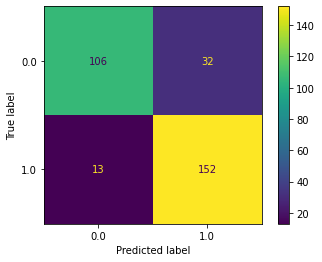

In [3]:
lg = LogisticRegression() #instancio la clase
modelo_lg = lg.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred = modelo_lg.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# Es una mala idea predecir con los mismos datos de entrenamiento: recordar que el objetivo es
# predecir la clasif. de datos NUEVOS no utilizados para entrenar el modelo.

# matriz de confusión
conf = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=lg.classes_)
disp.plot(values_format='d') 

# Clasificación por punto de corte arbitrario

[[0.199 0.801]
 [0.341 0.659]
 [0.043 0.957]
 [0.092 0.908]
 [0.193 0.807]
 [0.243 0.757]
 [0.18  0.82 ]
 [0.157 0.843]
 [0.213 0.787]
 [0.088 0.912]]


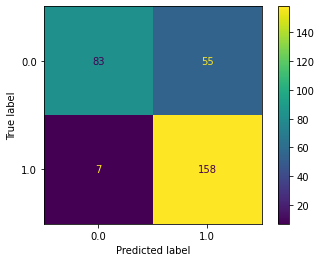

In [ ]:
probas = lg.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=3, suppress=True):
    print(probas[0:10])

# por ejemplo, por defecto asumo que SÍ tiene riesgo cardíco (y=1)
y_pred_custom = np.ones(y.shape)

#y si la probabilidad de y=0 es mayor a 0.8, lo clasifico como sin riesgo (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.8):
        y_pred_custom[i]=0.
# lo anterior se puede hacer más copado con listas por comprensión
# https://realpython.com/list-comprehension-python/
# https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion10/listas_comprension.html


conf_custom = confusion_matrix(y,y_pred_custom)

disp_custom = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=lg.classes_)
disp_custom.plot(values_format='d') 

# Visualizar resultados por Componentes principales

Varianza de las 1ras. dos CPs: [0.21254053 0.11820708]
Loadins/cargas (relación entre vars. originales y las CPs:
[[ 0.31420252  0.09083783 -0.27460749  0.18392019  0.11737503  0.07363999
  -0.12772792 -0.41649811  0.36126745  0.41963899 -0.37977222  0.27326172
   0.22202375]
 [ 0.40614872 -0.37779171  0.29726609  0.43818675  0.36451402  0.31743328
  -0.22088181  0.07787618 -0.2631179  -0.05225497  0.04837415  0.09414721
  -0.20072042]
 [-0.09407661  0.55484915  0.35697431  0.2038493  -0.40782498  0.48173624
  -0.08919083  0.15825529 -0.1263561   0.1103429  -0.07381839  0.18356934
   0.12501113]
 [-0.0206618  -0.25530873  0.28790041  0.02260103 -0.34340982 -0.06860532
   0.26609555 -0.18412539 -0.11505621  0.32629597 -0.49484894 -0.32801632
  -0.38919138]
 [-0.30715312  0.0507044   0.16317945  0.18813809  0.3200667  -0.23344184
  -0.39366727  0.32328431  0.03453568  0.25057927 -0.24682275 -0.43536515
   0.33195049]
 [-0.12829615  0.05496875 -0.19341117 -0.17945982 -0.10472957  0.249613

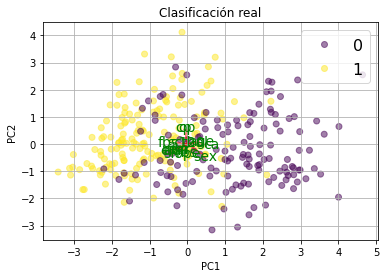

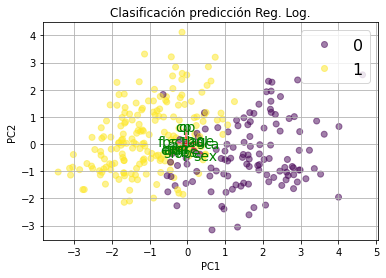

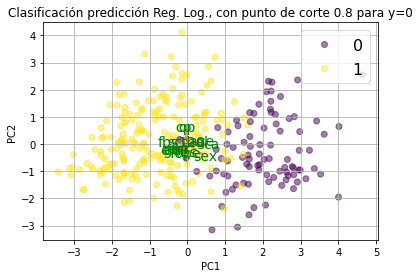

In [ ]:
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)


def myplot(score,coeff,clases,labels=None):
    plt.figure()
    
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=clases, alpha=0.5)#, cmap=colours)
    
    # muestra etiquetas de las clases de la clasificación
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



print('Varianza de las 1ras. dos CPs:', pca.explained_variance_ratio_[0:2])

print('Loadins/cargas (relación entre vars. originales y las CPs:')
print(pca.components_)
#Grafico las primeras dos componentes principales para cada clasificación

#clasificación real
myplot(x_new[:,0:2], pca.components_, y, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación real")
plt.grid()
plt.show()

#clasificación Reg. Log.
myplot(x_new[:,0:2], pca.components_, y_pred, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Reg. Log.")
plt.grid()
plt.show()

#clasif. Reg. Log. con punto de corte 0.8 para y=0
myplot(x_new[:,0:2], pca.components_, y_pred_custom, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Reg. Log., con punto de corte 0.8 para y=0")
plt.grid()
plt.show()


# Matriz de confusión:

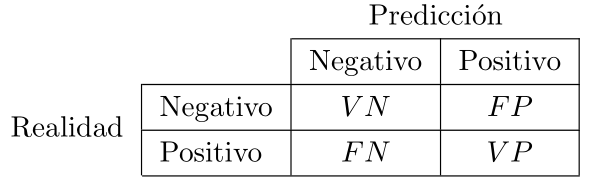

- VP = verdadero positivo
- VN = verdadero negativo
- FP = falso positivo
- FN = falso negativo

# Métricas para evaluar la clasificación:

### Accuracy
$$\text{Accuracy = }\frac{VP+VN}{Total} = \frac{VP+VN}{VP+VN+FP+FN}$$

### Recall
$$\text{Recall = }\frac{VP}{VP+FN}$$

### Precision
$$\text{Precision = }\frac{VP}{VP+FP}$$

In [ ]:
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

print('Punto de corte por prob. más alta')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))


accuracy = accuracy_score(y, y_pred_custom)
recall = recall_score(y, y_pred_custom)
precision = precision_score(y, y_pred_custom)

print('')
print('Punto de corte 0.8 para y=0')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

Punto de corte por prob. más alta
Accuracy:  0.85
Recall:  0.92
Precision:  0.83

Punto de corte 0.8 para y=0
Accuracy:  0.8
Recall:  0.96
Precision:  0.74


# ¿No era que había que evaluar al modelo en datos nuevos?

### Sí, para esto se hace el _train/test split_:

## Separación de los datos en dos conjuntos **disjuntos**:

- Datos de entrenamiento (train): se usan para construir el modelo predictor.
- Datos de testeo (test): se usan para evaluar el modelo predictor.

### Separaciones usuales: 70/30 u 80/20 % entre train y test.

Métricas sobre datos nuevos de TEST
Accuracy:  0.85
Recall:  0.9
Precision:  0.83


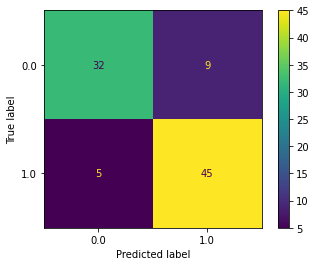

In [4]:
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )
nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']

# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]

# Separo en train/test. El stratify es para conservar el balance de clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=474077)


# Standarizo datos de ENTRENAMIENTO
scaler = StandardScaler()
scaler.fit(X_train) #calcula promedio y desvío
# print("Promedio datos entrenamiento", scaler.mean_)
# print("Varianza datos entrenamiento", scaler.var_)
X_train = scaler.transform(X_train) #estandariza con promedio y desvío anteriores

# Standarizo datos de TESTEO con los mismos promedio y desvío calculados para entrenamiento
X_test = scaler.transform(X_test)
# ¿Por qué hago esto? Porque en teoría los datos de entrenamientos son desconocidos a la hora de entrenar el modelo.


lg2 = LogisticRegression() #instancio la clase
#entreno modelo predictivo a partir de los datos de ENTRENAMIENTO
modelo_lg2 = lg2.fit(X_train, y_train) 
# clasifico según el modelo, es decir predigo las clases, con los datos de TESTEO.
y_pred_test = modelo_lg2.predict(X_test) 


# matriz de confusión: comparo clases reales vs. clases predichas con los datos de TESTEO.
conf = confusion_matrix(y_test,y_pred_test)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=lg2.classes_)
disp.plot(values_format='d') 


# métricas de evaluación sobre los datos de TESTEO.
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)

print('Métricas sobre datos nuevos de TEST')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

# Coeficientes de la Regresión Logística

In [5]:
lg2.coef_

array([[ 0.14993705, -0.58970085,  0.88407993, -0.22448989, -0.14470802,
        -0.00834857,  0.25952478,  0.63990021, -0.45756538, -0.29689809,
         0.41377112, -0.74976001, -0.71348571]])